In [0]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from vega_datasets import data

In [0]:
# load the data and check the shape
upempl_data = data.unemployment_across_industries()
upempl_data.shape

(1708, 6)

In [49]:
# take a quick look at the data
upempl_data['total_count'] = (upempl_data['count']*100)/upempl_data['rate']
upempl_data.head()

,count,date,month,rate,series,year,total_count
0,430,2000-01-01 08:00:00,1,2.1,Government,2000,20476.190476
1,409,2000-02-01 08:00:00,2,2.0,Government,2000,20450.000000
2,311,2000-03-01 08:00:00,3,1.5,Government,2000,20733.333333
3,269,2000-04-01 08:00:00,4,1.3,Government,2000,20692.307692
4,370,2000-05-01 07:00:00,5,1.9,Government,2000,19473.684211


In [0]:
# summary statistics
upempl_data.describe()

,count,month,rate,year
count,1708.000000,1708.000000,1708.000000,1708.000000
mean,552.884660,6.418033,5.673770,2004.590164
std,423.456201,3.483623,3.158523,2.933865
min,2.000000,1.000000,0.300000,2000.000000
25%,233.000000,3.000000,3.400000,2002.000000
50%,447.000000,6.000000,5.000000,2005.000000
75%,820.250000,9.000000,7.000000,2007.000000
max,2440.000000,12.000000,27.100000,2010.000000


In [50]:
len(upempl_data.series.unique())
upempl_data.groupby(["series"]).mean()

,count,month,rate,year,total_count
series,,,,,
Agriculture,132.270492,6.418033,9.840984,2004.590164,1349.487138
Business services,910.344262,6.418033,6.919672,2004.590164,13083.209889
Construction,868.221311,6.418033,9.426230,2004.590164,9241.223439
Education and Health,633.418033,6.418033,3.420492,2004.590164,18268.316943
Finance,329.065574,6.418033,3.540164,2004.590164,9277.127892
Government,538.795082,6.418033,2.581148,2004.590164,20822.046989
Information,189.040984,6.418033,5.486885,2004.590164,3476.037511
Leisure and hospitality,993.614754,6.418033,8.315574,2004.590164,11869.690336
Manufacturing,1021.106557,6.418033,5.982787,2004.590164,17343.554678


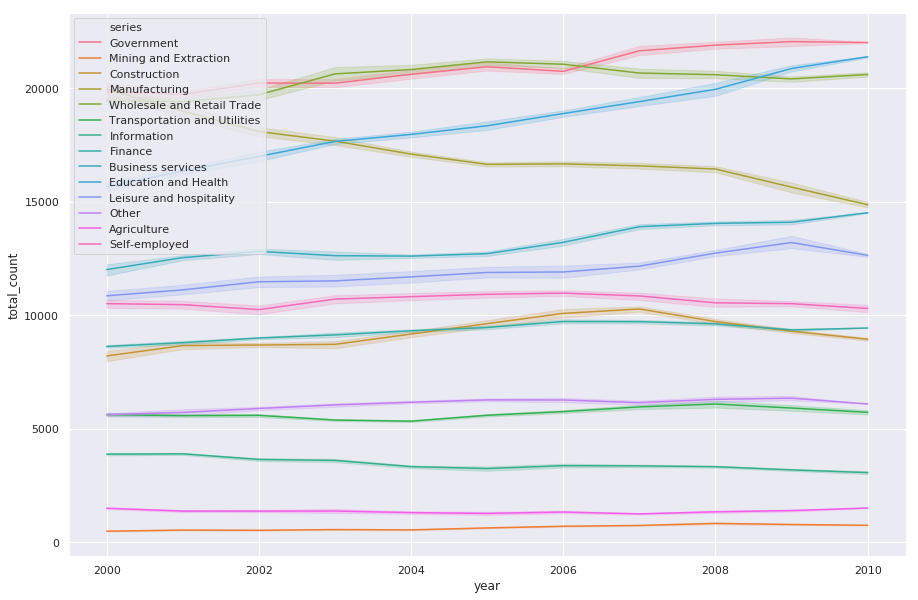

In [60]:
upempl_data.reset_index()
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
#sns.lineplot(x='year', y='rate', hue='series', data=upempl_data)
sns.lineplot(x='year', y='total_count', hue='series', data=upempl_data)
plt.show()

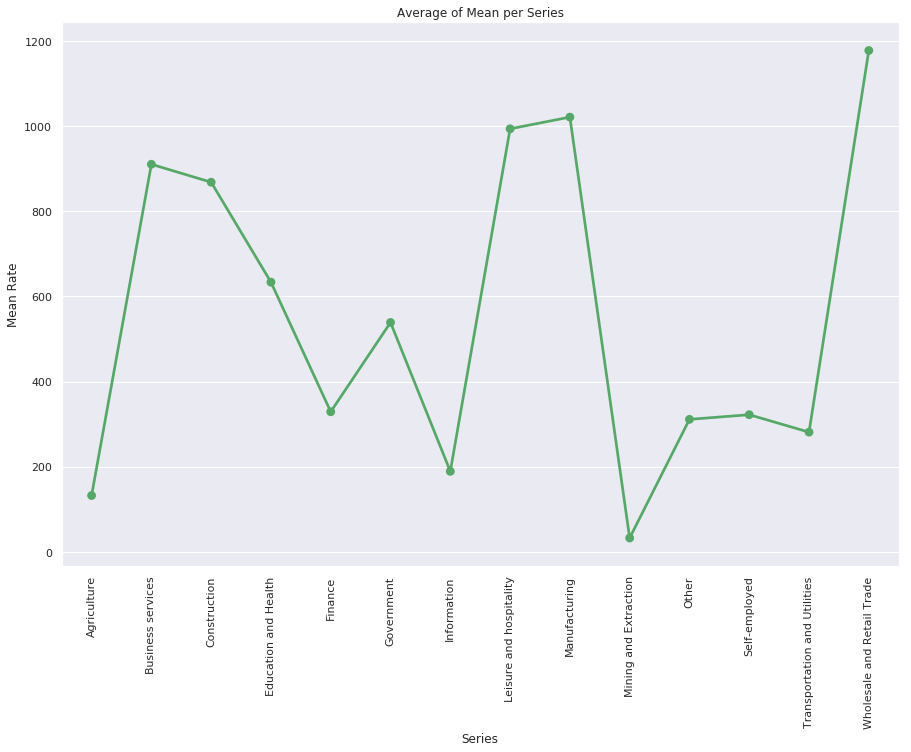

In [0]:
grouped_df = upempl_data.groupby(["series"])["count"].aggregate("mean").reset_index()

plt.figure(figsize=(15,10))
color = sns.color_palette()
sns.pointplot(grouped_df['series'].values, grouped_df['count'].values, alpha=0.8, color=color[2])
plt.ylabel('Mean Rate')
plt.xlabel('Series')
plt.title("Average of Mean per Series")
plt.xticks(rotation='vertical')
plt.show()

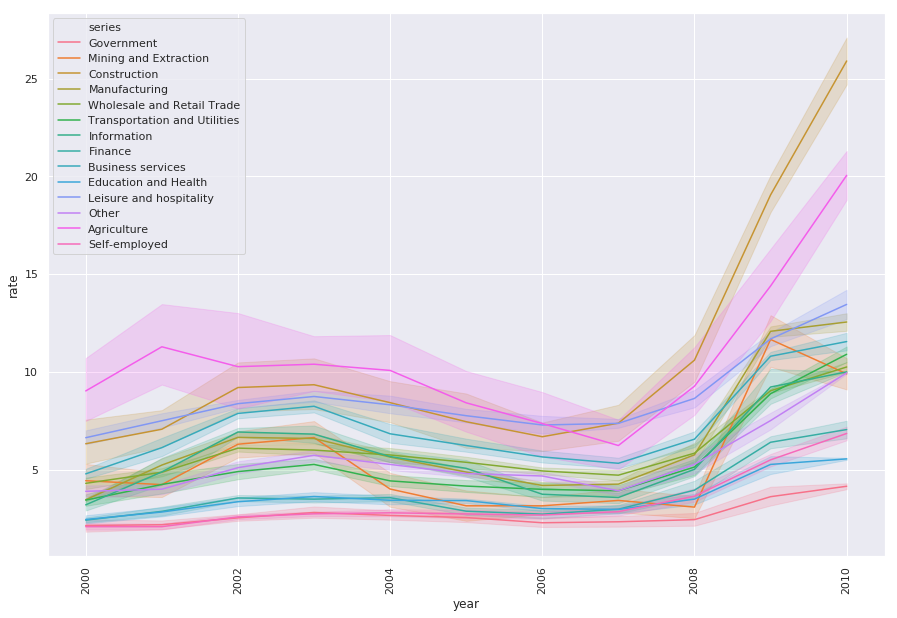

In [48]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='year', y='rate', hue='series', data=upempl_data)
plt.xticks(rotation='vertical')
plt.show()

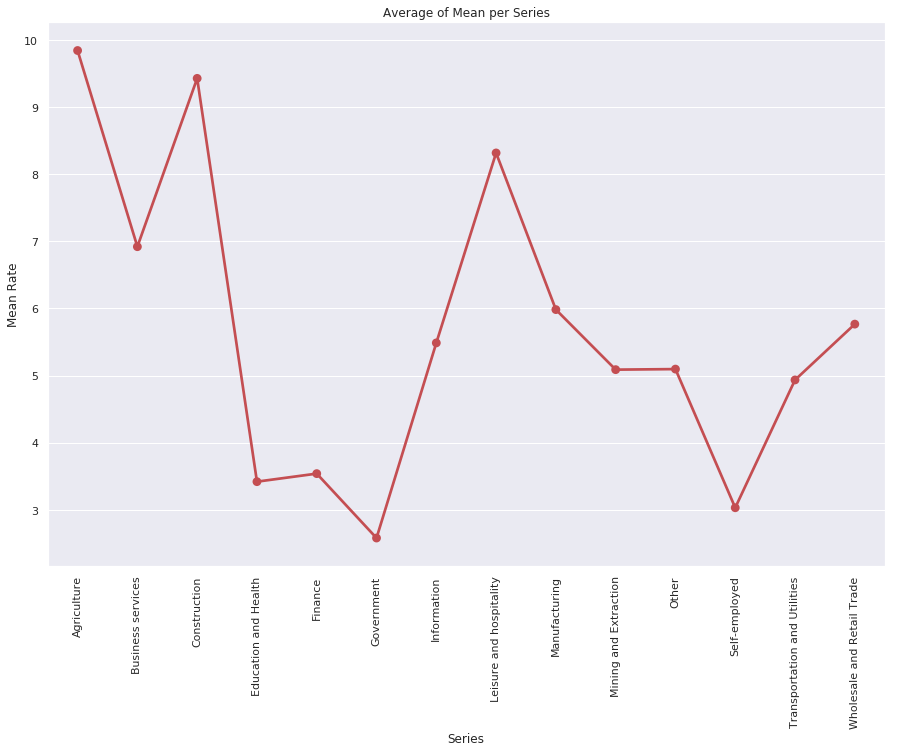

In [0]:
grouped_df2 = upempl_data.groupby(["series"])["rate"].aggregate("mean").reset_index()

plt.figure(figsize=(15,10))
color = sns.color_palette()
sns.pointplot(grouped_df2['series'].values, grouped_df2['rate'].values, alpha=0.8, color=color[3])
plt.ylabel('Mean Rate')
plt.xlabel('Series')
plt.title("Average of Mean per Series")
plt.xticks(rotation='vertical')
plt.show()

In [0]:
grouped_df = upempl_data.groupby(["series"])["count", "rate"].aggregate("mean").reset_index()
grouped_df

,series,count,rate
0,Agriculture,132.270492,9.840984
1,Business services,910.344262,6.919672
2,Construction,868.221311,9.426230
3,Education and Health,633.418033,3.420492
4,Finance,329.065574,3.540164
5,Government,538.795082,2.581148
6,Information,189.040984,5.486885
7,Leisure and hospitality,993.614754,8.315574
8,Manufacturing,1021.106557,5.982787
9,Mining and Extraction,32.475410,5.088525


In [0]:
count_std = np.std(grouped_df['count'].values)
rate_std = np.std(grouped_df['rate'].values)
count_mean = np.mean(grouped_df['count'].values)
rate_mean = np.mean(grouped_df['rate'].values)
print(count_std, rate_std)
print(count_mean, rate_mean)

363.8395688676115 2.195952537714372
552.8846604215456 5.673770491803279


In [0]:
lambda x: (x-count_mean)/count_std

grouped_df['count_su'] = (grouped_df['count']-count_mean)/count_std
grouped_df['rate_su'] = (grouped_df['rate']-rate_mean)/rate_std
grouped_df


,series,count,rate,count_su,rate_su
0,Agriculture,132.270492,9.840984,-1.156043,1.897679
1,Business services,910.344262,6.919672,0.982465,0.567363
2,Construction,868.221311,9.426230,0.866691,1.708807
3,Education and Health,633.418033,3.420492,0.221343,-1.026105
4,Finance,329.065574,3.540164,-0.615159,-0.971609
5,Government,538.795082,2.581148,-0.038725,-1.408329
6,Information,189.040984,5.486885,-1.000011,-0.085104
7,Leisure and hospitality,993.614754,8.315574,1.211331,1.203033
8,Manufacturing,1021.106557,5.982787,1.286891,0.140721
9,Mining and Extraction,32.475410,5.088525,-1.430326,-0.266511


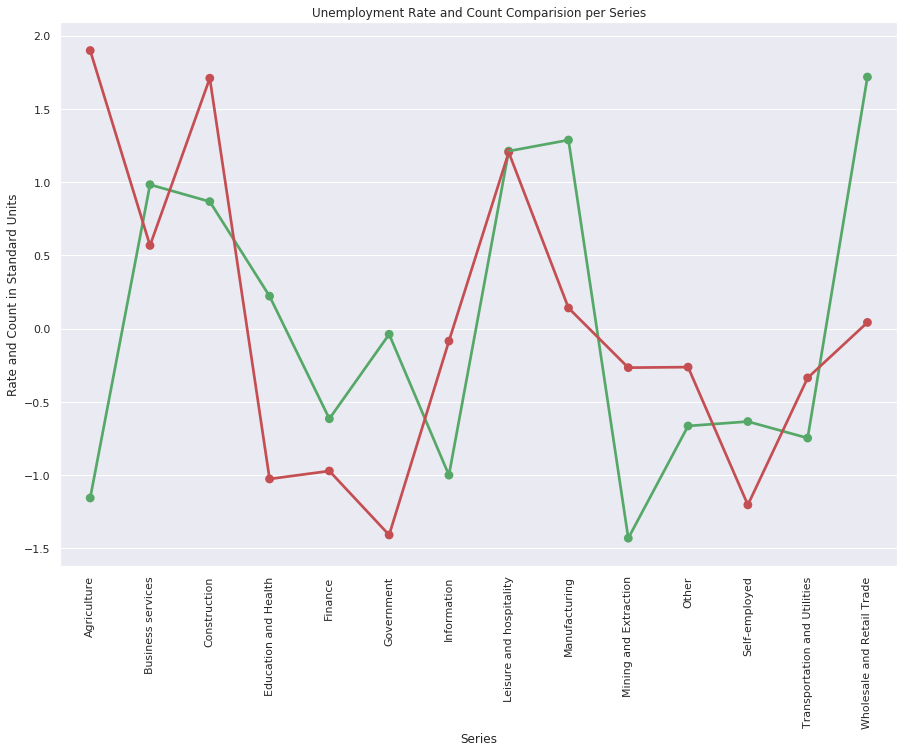

In [63]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(15,10))
color = sns.color_palette()
sns.pointplot(grouped_df['series'].values, grouped_df['count_su'].values, label='Count', color=color[2])
sns.pointplot(grouped_df['series'].values, grouped_df['rate_su'].values, label='Rate', color=color[3])

plt.ylabel('Rate and Count in Standard Units')
plt.xlabel('Series')
plt.title("Unemployment Rate and Count Comparision per Series")
plt.xticks(rotation='vertical')
plt.savefig("Point_Plot.png")
plt.show()

In [0]:
from google.colab import files
files.download("Point_Plot.png")